# Regresión Lineal

$$ y = W_0 + W_1 x $$

La pendiente de la recta es

$$ W_1 = \frac{ \sum (x-\bar{x}) (y-\bar{y}) }{ \sum (x-\bar{x})^2 } $$

La linea de regresión debe pasar los los promedios de *X* y *Y*. Con esto se termina de calcular el W0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def estimate_W0_W1(x, y):

    m_x, m_y = np.mean(x), np.mean(y)

    numerador = np.sum((x-m_x)*(y-m_y))
    denominador = np.sum(x*(x-m_x))
    #propiedad matematica compleja aplicada.

    W_1 = numerador / denominador
    W_0 = m_y - W_1*m_x

    return(W_0, W_1)

In [ ]:
def plot_regression(x, y, W):
    plt.scatter(x, y, color = "g", marker = "o", s=50)

    y_pred = W[0] + W[1]*x
    plt.plot(x, y_pred, color = "b")

    #etiquetado
    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')

    plt.show()

Los valores b0 = 1.5, b1 =0.9


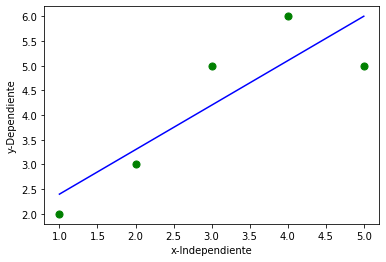

In [ ]:
def main():
    
    #DATASET
    x = np.array([1,2,3,4,5])
    y = np.array([2,3,5,6,5])

    #Obtenemos b1 y b2
    W = estimate_W0_W1(x, y)
    print("Los valores b0 = {}, b1 ={}".format(W[0], W[1]))

    #Graficamos nuestra linea de regresion
    plot_regression(x, y, W)

if __name__== "__main__":
    main()

---
---
---

## DotCSV

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

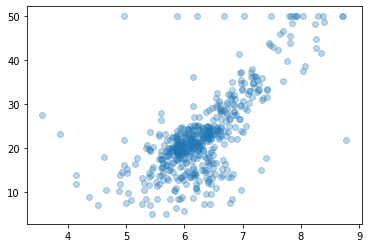

In [ ]:
# x = np.array(boston.data[:,5])
# average number of rooms per dwelling
X_raw = boston.data[:,5]
Y = boston.target

plt.scatter(X_raw,Y, alpha=0.3)

In [ ]:
# columna de 1s para termino independiente
X = np.array([np.ones(len(X_raw)), X_raw]).T
print(X.shape)
X

(506, 2)


array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

### Minimizar error cuadrático medio (MCE)

$$ Y = X \beta $$

$$ \beta = (X^{T}X)^{-1}X^{T}Y $$

In [ ]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B
# punto de corte eje y, pendiente

array([-34.67062078,   9.10210898])

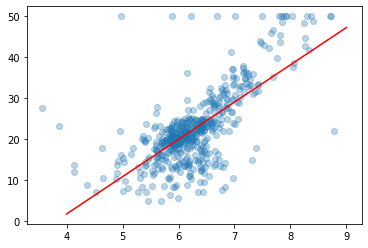

In [ ]:
plt.scatter(X_raw,Y, alpha=0.3)
plt.plot([4,9], [ B[0]+B[1]*4 , B[0]+B[1]*9], c="red")

### Usando scikit Learn

pendiente =  [9.10210898]
corte eje y =  -34.67062077643857


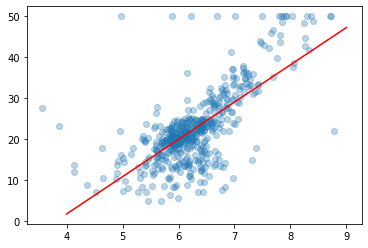

In [ ]:
from sklearn.linear_model import LinearRegression

# SE USA X_RAW, no es necesaria la columna de unos
# Reshape your data using array.reshape(-1, 1) 
# if your data has a single feature
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_raw.reshape(-1, 1), Y)
print("pendiente = ", regresion_lineal.coef_)
print("corte eje y = ", regresion_lineal.intercept_)
plt.scatter(X_raw,Y, alpha=0.3)
plt.plot([4,9], 
    [ regresion_lineal.intercept_ + regresion_lineal.coef_*4 , 
    regresion_lineal.intercept_ + regresion_lineal.coef_*9], 
    c="red")

### Outliers

https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

https://www.youtube.com/watch?v=AyXmqHJ0SOk&ab_channel=LearnDataSciencewithPranjal

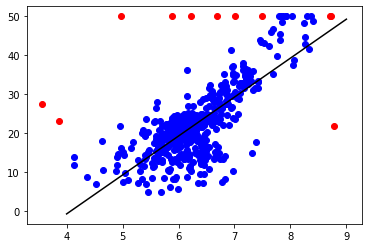

In [ ]:
from sklearn.covariance import EllipticEnvelope

data = np.column_stack((X_raw, Y))

pred =  EllipticEnvelope(contamination=0.02).fit_predict(data)
outlier_values = data[np.where(pred == -1)]
accepted_values = data[np.where(pred == 1)]
plt.scatter(accepted_values[:,0], accepted_values[:,1], color="b")
plt.scatter(outlier_values[:,0], outlier_values[:,1], color="r")

regresion_lineal = LinearRegression()
regresion_lineal.fit(accepted_values[:,0].reshape(-1, 1), accepted_values[:,1])
plt.plot([4,9], 
    [ regresion_lineal.intercept_ + regresion_lineal.coef_*4 , 
    regresion_lineal.intercept_ + regresion_lineal.coef_*9], 
    c="k")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>